# Bayesian RMSE

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X = np.linspace(0, 4, 100)
y = np.sin(X)

np.random.seed(0)

In [14]:
s = np.random.normal(y, 0.4, (300, len(y)))

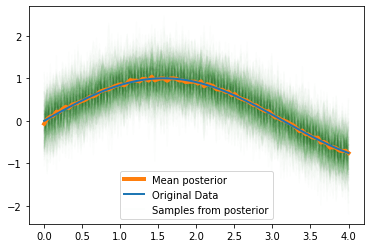

In [15]:
plt.plot(X, y, zorder=5, lw=2, label = 'Original Data')
plt.plot(X, s.T, alpha=0.01, color='g', label='Samples from posterior');
plt.plot(X, s[:,:].mean(axis=0), lw=4, label = 'Mean posterior')
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
labels, ids = np.unique(labels, return_index=True)
handles = [handles[i] for i in ids]
plt.legend(handles, labels, loc='best')


#### RMS error when using mean of posterior prediction

In [16]:
mean_prediction = s[:,:].mean(axis=0)
mean_prediction

array([-0.07004195,  0.04751276,  0.09759742,  0.11789457,  0.21427344,
        0.20985766,  0.27810178,  0.32881364,  0.29969094,  0.37635274,
        0.3998193 ,  0.42408952,  0.46012609,  0.48194669,  0.52142252,
        0.57031062,  0.5761269 ,  0.61095479,  0.6792676 ,  0.7082351 ,
        0.7324754 ,  0.74169659,  0.77698195,  0.81710438,  0.84137084,
        0.86122165,  0.83358927,  0.88828312,  0.95684152,  0.94477208,
        0.9463973 ,  0.92679347,  0.98473531,  0.98147874,  0.9452241 ,
        1.03758451,  0.95102685,  0.9809409 ,  0.99811435,  0.99644932,
        0.94059271,  0.99697946,  1.00064976,  0.98783511,  0.94688204,
        0.95416664,  0.91127648,  0.91841624,  0.91865397,  0.92160948,
        0.875209  ,  0.92601177,  0.8122571 ,  0.86294446,  0.84156143,
        0.81737044,  0.74412362,  0.73337021,  0.72716973,  0.67899882,
        0.68556486,  0.60327489,  0.62996877,  0.55810927,  0.52321028,
        0.49380097,  0.47119885,  0.42371262,  0.37188622,  0.36

In [17]:
np.sqrt(((y - mean_prediction)**2).mean())

0.024518354804360234

#### RMS error on different samples

In [18]:
def plot_sample_error(sample_num = 1):
    plt.plot(X, y, zorder=5, lw=2, label = 'Original Data')
    plt.plot(X, s[sample_num].T, alpha=1, color='g', label=f'Sample #{sample_num} from posterior');
    plt.plot(X, s[:,:].mean(axis=0), lw=4, label = 'Mean posterior')
    plt.legend()
    plt.title(f"Sample {sample_num}  RMSE: {np.sqrt(((y -s[sample_num, :])**2).mean()):0.2f}")

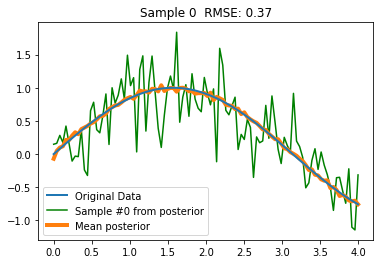

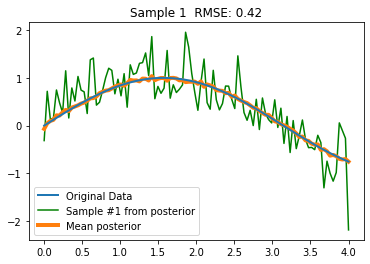

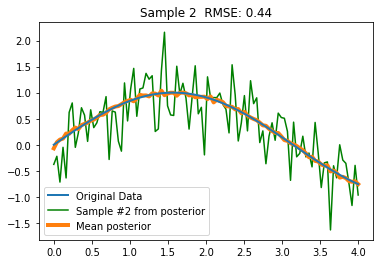

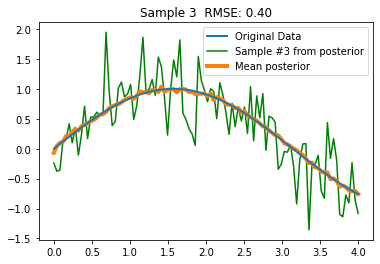

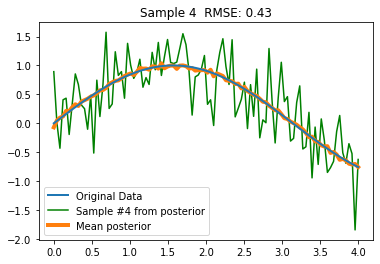

In [19]:
for i in range(5):
    plt.figure()
    plot_sample_error(i)

#### Histogram Plot of RMS errors for the different samples

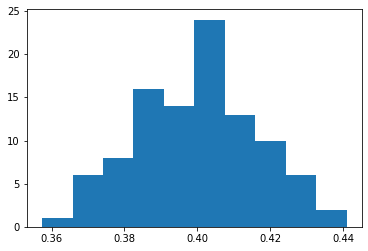

In [20]:
plt.hist(np.sqrt(((y - s[:, :])**2).mean(axis=0)));

The number is significantly higher than the number we obtained when we used the mean prediction!

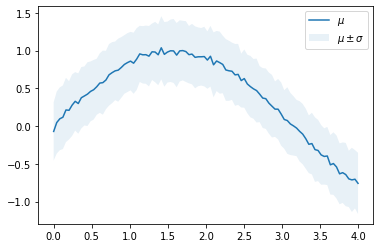

In [21]:
plt.plot(X, s.mean(axis=0),label=r'$\mu$')
plt.fill_between(X, s.mean(axis=0)-s.std(axis=0), s.mean(axis=0)+s.std(axis=0), alpha=0.1, label=r'$\mu \pm \sigma$')
plt.legend()

In [22]:
np.sqrt(((y - s.mean(axis=0) - s.std(axis=0) )**2).mean())

0.4004133884990699

In [23]:
np.sqrt(((y - s.mean(axis=0)+s.std(axis=0) )**2).mean())

0.4007497622023333

In [24]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [25]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [37]:
gp.fit(X.reshape(-1, 1), y+0.02*np.random.random(y.shape))

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9)

In [38]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X.reshape(-1, 1), return_std=True)

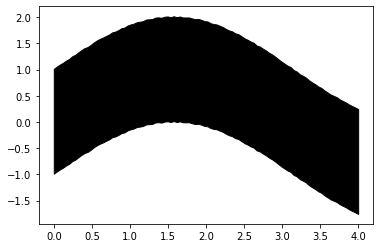

In [47]:
#plt.plot(X, y)
#plt.plot(X, y_pred)
plt.fill_between(X, y_pred-100000*sigma, y_pred+100000*sigma, color='k')

In [44]:
y_pred-sigma

array([ 0.01342185,  0.05799466,  0.09608793,  0.12992709,  0.17157375,
        0.20282776,  0.25499653,  0.282282  ,  0.32986152,  0.37158924,
        0.4095693 ,  0.42995457,  0.46946371,  0.51782948,  0.55548231,
        0.58650726,  0.61094587,  0.64171059,  0.6693134 ,  0.71063174,
        0.72495462,  0.75314501,  0.78955165,  0.80170612,  0.84133279,
        0.86212256,  0.87687861,  0.90422804,  0.91373808,  0.92394538,
        0.95498202,  0.95922187,  0.96421421,  0.99137797,  0.99717466,
        0.9886889 ,  1.00800273,  1.01445418,  0.9999763 ,  1.01805618,
        0.99939809,  1.01319475,  0.99457863,  0.9944947 ,  0.99460071,
        0.97574148,  0.9612097 ,  0.96625563,  0.94902943,  0.92448389,
        0.91854805,  0.88446798,  0.86921882,  0.86092804,  0.83493858,
        0.81110652,  0.77542843,  0.74703006,  0.72988716,  0.6928115 ,
        0.67646638,  0.63738334,  0.59764753,  0.57000334,  0.53602193,
        0.51197752,  0.45873343,  0.43958963,  0.39971398,  0.36